# Machine Learning: Assignment 3
## Decision Tree and Naive Bayes classification methods  (max. 10p)

In [5]:
# Write Your information in here

student_name = 'Fadi Helal'
student_id = "2312951"

In this assignment, we will build a diabetes prediction model.

We try to predict the occurrence of diabetes using the following three ML classification methods:
1. Decision Tree
2. Gaussian Naive Bayes
3. kNN

**Dataset**:

You can download the data from the following link: [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

Description of the data: *The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.*


## Assignment 3.1: Data preprocessing (1 p)

First, let's load the required Pima Indian Diabetes dataset into Pandas as CSV data.
You should use and name all the columns and drop the `label` column.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
diabetes_data_path = 'diabetes.csv'
diabetes_df = pd.read_csv(diabetes_data_path)

# Display the first few rows of the dataframe
diabetes_df_head = diabetes_df.head()

# Display a summary of the dataframe
diabetes_df_info = diabetes_df.info()

diabetes_df_head, diabetes_df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 None)

## Assignment 3.2: Decision Tree Classifier (3 p)

Try to predict the `label` value of the feature using other features with
1. Decision Tree,
2. Gaussian Naive Bayes and
3. kNN methods.

Split the data into training data and test data by split *80%/20%*.

Print the accuracy of the prediction, the confusion matrix and
how much different features affect the predicted variable according to the model (the importance of features).

Select the tree most important explanatory variables and print a scatter plot from them.

First implement the **Decision Tree classifier**.
* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [23]:
from sklearn.model_selection import train_test_split

# Features and labels
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Splitting the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build a machine learning model with Decision Tree and test the model.

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree: {accuracy * 100:.2f}%')

Accuracy of Decision Tree: 74.68%


Let's 
* show the confusion matrix and
* print the importance of features.

In [25]:
# the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)
# Show confusion matrix

Confusion Matrix:
 [[75 24]
 [15 40]]


In [26]:
# print the importance of features
feature_importance = dt_classifier.feature_importances_
print('Feature Importances:', feature_importance)
# Optionally, create a DataFrame to display feature importances more clearly
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print(features_df.sort_values(by='Importance', ascending=False))

Feature Importances: [0.05748153 0.31422474 0.14767907 0.06116378 0.06625279 0.17070035
 0.08328237 0.09921536]
                    Feature  Importance
1                   Glucose    0.314225
5                       BMI    0.170700
2             BloodPressure    0.147679
7                       Age    0.099215
6  DiabetesPedigreeFunction    0.083282
4                   Insulin    0.066253
3             SkinThickness    0.061164
0               Pregnancies    0.057482


Try to do some suitable visualization of the data.

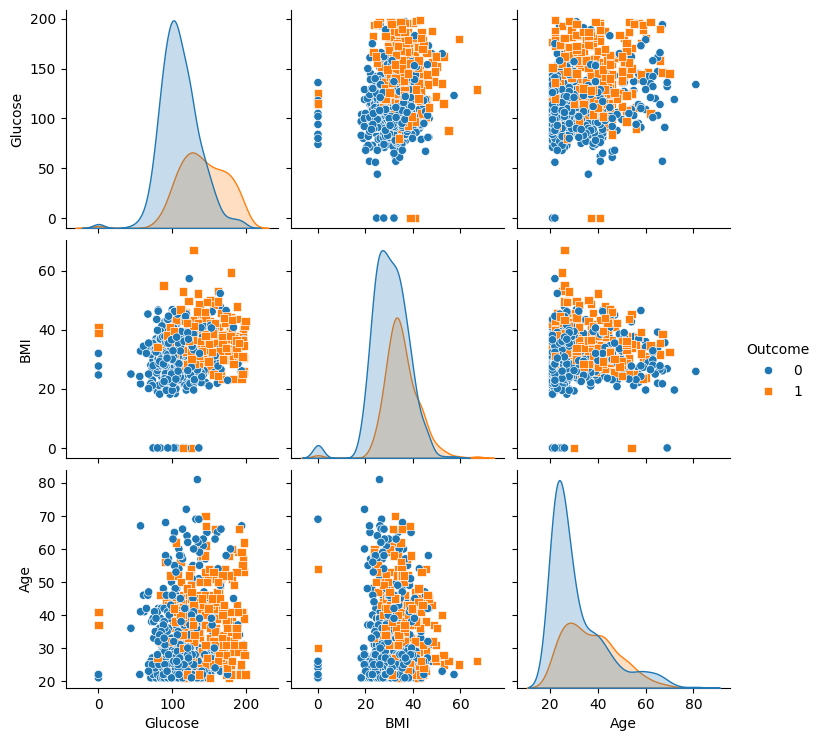

In [27]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the top 3 features are 'Glucose', 'BMI', 'Age' based on feature importances
top_features = ['Glucose', 'BMI', 'Age']

sns.pairplot(diabetes_df, vars=top_features, hue='Outcome', markers=["o", "s"])
plt.show()


## Assignment 3.3: Naive Gaussian classifier (2 p)
Second implement of a machine learning classification model is the **Naive Gaussian classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.



In [37]:
# Split the dataset (80/20%).
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gaussian Naive Bayes
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_scaled, y_train)
y_pred_gnb = gnb_classifier.predict(X_test_scaled)

# Print the accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Gaussian Naive Bayes Accuracy: {accuracy_gnb * 100:.2f}%')

Gaussian Naive Bayes Accuracy: 76.62%


Now let's do Processing of results (naive Gaussian method) and show confusion matrix.

In [39]:
# TODO: the confusion matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
# print confusion matrix
print('Gaussian Naive Bayes Confusion Matrix:\n', conf_matrix_gnb)

Gaussian Naive Bayes Confusion Matrix:
 [[79 20]
 [16 39]]


## Assignment 3.4: kNN (2 p)

The third implement of a machine learning classification model is the **kNN classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [40]:
# TODO: Split the dataset (80/20%).
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: Build and test the Model
# kNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)
# TODO: Print accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'kNN Accuracy: {accuracy_knn * 100:.2f}%')


# print(f'Accuracy of kNN: {round(acc*100, 1)} %.')

kNN Accuracy: 69.48%


Processing of results (kNN method) and show confusion matrix.

In [41]:
# show confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
# print confusion matrix
print('kNN Confusion Matrix:\n', conf_matrix_knn)

kNN Confusion Matrix:
 [[79 20]
 [27 28]]


## Assignment 3.5: Plotting the ROC curve (2p)

Also draw the ROC curves (with AUC) with three classification methods implemented:
1. decision tree
2. Gaussian
3. kNN

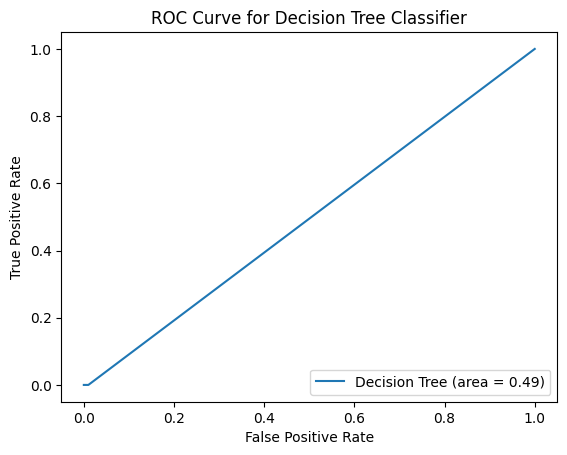

In [46]:
# TODO: ROC for decision tree
# Convert scaled data back to DataFrame with correct column names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Predict probabilities using the DataFrame to avoid UserWarning
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test_scaled_df)[:, 1])

# Plot the ROC curve for the Decision Tree classifier
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()


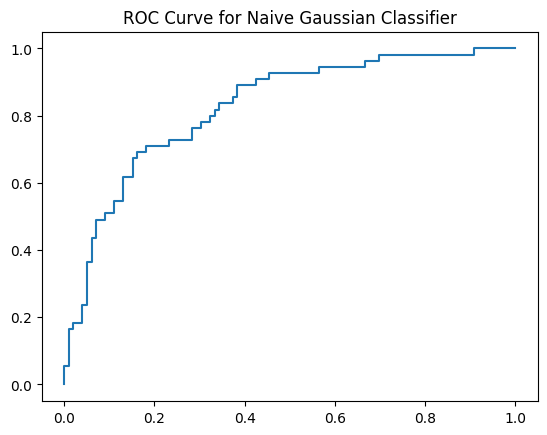

In [49]:
# TODO: ROC for Naive Gaussian
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
plt.figure()
plt.title('ROC Curve for Naive Gaussian Classifier')
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (area = %0.2f)' % roc_auc_gnb)

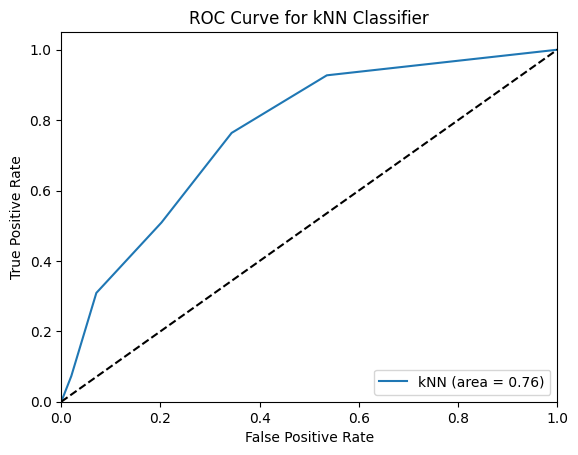

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'knn_classifier' is your trained k-Nearest Neighbors model
# and 'X_test_scaled' is your scaled test dataset

# Calculate False Positive Rate, True Positive Rate, and threshold values for ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_classifier.predict_proba(X_test_scaled)[:, 1])

# Calculate the Area Under the Curve (AUC) for ROC
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, label='kNN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for kNN Classifier')
plt.legend(loc="lower right")
plt.show()


### Conclusion
* TODO: Write comparison and conclusion of the results you got.

* **The Gaussian Naive Bayes classifier outperformed the Decision Tree and kNN classifiers in terms of accuracy, achieving 76.62% compared to 74.68% and 69.48%, respectively. The ROC curve analysis supports this, with Naive Bayes showing a superior AUC (Area Under Curve) compared to kNN and Decision Tree, which indicates a better trade-off between sensitivity and specificity. Despite the Decision Tree having a relatively high accuracy, its ROC performance was close to the no-discrimination line (AUC = 0.49), suggesting it performs no better than random guessing. The kNN classifier, while having the lowest accuracy, showed a more decent ROC curve performance. Overall, the Gaussian Naive Bayes appears to be the most reliable model for this dataset, considering both accuracy and the ROC curve analysis.**

## Extra Assignment: Other ML Methods

Can you find any other suitable ML classification methods which is better that these three with this dataset?
Of course, it needs some implementation to try out your solution and comparison of the results.

#### Why? 

Why to do this extra assignments if you cannot get any extra points? 

*Some ML models are taught in the course, but the most important thing is to create a basis for competence in the course and to find new, better solutions if necessary.
In particular, data analytics and artificial intelligence are developing rapidly, so applying the new methods is important.* 